In [68]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
data = pd.read_excel(r"C:\Users\Krishi\Documents\Text_extraction\final_my update.xlsx")
data.head()

,PDF,Cyan Count,Magenta Count,Yellow Count,Black Count,Pantone Colors Count,Total Colors Found,White Count,Varnish Count,Digital or Other,Instructions Extracted,Eligible to Bypass PP
0,7302666_SGS Europe Technical Summary_PP.pdf,1,1,1,1,0,5,0,1,1,:\n- Approved for prepress\n- Trap per printer...,Yes
1,7396666__SGS Europe Technical Summary.pdf,1,0,0,0,1,2,0,0,1,:\n- Below copy was added in production. Pleas...,Yes
2,7406125__SGS Europe Technical Summary.pdf,1,0,0,0,2,3,0,0,1,:\n- Below copy was added in production. Pleas...,Yes
3,7471055__SGS Europe Technical Summary.pdf,1,1,1,1,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,No
4,7471056__SGS Europe Technical Summary.pdf,1,1,1,1,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,No


In [70]:
data.shape

(486, 12)

In [71]:
sample_df = data.head(2).T
sample_df = sample_df.rename(columns = {0:'Ssample_1',1:'Sample_2'})
data_type = pd.DataFrame(data.dtypes,columns=['Data_type'])
null_data = pd.DataFrame(data.isnull().sum(),columns=['Null data'])
sample_data = pd.concat([sample_df,data_type,null_data],axis=1)
sample_data

,Ssample_1,Sample_2,Data_type,Null data
PDF,7302666_SGS Europe Technical Summary_PP.pdf,7396666__SGS Europe Technical Summary.pdf,object,0
Cyan Count,1,1,int64,0
Magenta Count,1,0,int64,0
Yellow Count,1,0,int64,0
Black Count,1,0,int64,0
Pantone Colors Count,0,1,int64,0
Total Colors Found,5,2,int64,0
White Count,0,0,int64,0
Varnish Count,1,0,int64,0
Digital or Other,1,1,int64,0


In [72]:
data['Instructions Extracted'] = data['Instructions Extracted'].fillna("Not applicable")
print(data.isnull().sum())


PDF                       0
Cyan Count                0
Magenta Count             0
Yellow Count              0
Black Count               0
Pantone Colors Count      0
Total Colors Found        0
White Count               0
Varnish Count             0
Digital or Other          0
Instructions Extracted    0
Eligible to Bypass PP     0
dtype: int64


In [73]:
data['Instructions Extracted'].head()

0    :\n- Approved for prepress\n- Trap per printer...
1    :\n- Below copy was added in production. Pleas...
2    :\n- Below copy was added in production. Pleas...
3    :\n- Separate per job specs to print Surface D...
4    :\n- Separate per job specs to print Surface D...
Name: Instructions Extracted, dtype: object

In [74]:
data.drop(['PDF'],axis=1,inplace=True)

In [75]:
data.columns

Index(['Cyan Count', 'Magenta Count', 'Yellow Count', 'Black Count',
       'Pantone Colors Count', 'Total Colors Found', 'White Count',
       'Varnish Count', 'Digital or Other', 'Instructions Extracted',
       'Eligible to Bypass PP'],
      dtype='object')

In [76]:
mapping = {'Yes': 1, 'No': 0}

data[[ 'Eligible to Bypass PP']] = \
data[[ 'Eligible to Bypass PP']].replace(mapping)
data.head()

,Cyan Count,Magenta Count,Yellow Count,Black Count,Pantone Colors Count,Total Colors Found,White Count,Varnish Count,Digital or Other,Instructions Extracted,Eligible to Bypass PP
0,1,1,1,1,0,5,0,1,1,:\n- Approved for prepress\n- Trap per printer...,1
1,1,0,0,0,1,2,0,0,1,:\n- Below copy was added in production. Pleas...,1
2,1,0,0,0,2,3,0,0,1,:\n- Below copy was added in production. Pleas...,1
3,1,1,1,1,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,0
4,1,1,1,1,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,0


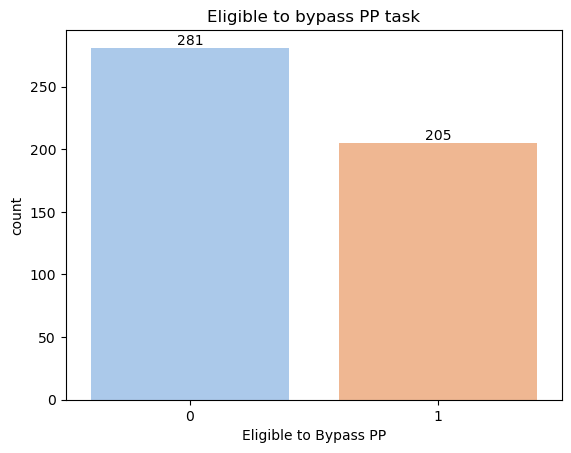

In [77]:
ax =sns.countplot(data=data,x='Eligible to Bypass PP',palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Eligible to bypass PP task')
plt.show()

In [78]:
round(data['Eligible to Bypass PP'].value_counts(normalize=True)*100,2)

Eligible to Bypass PP
0    57.82
1    42.18
Name: proportion, dtype: float64

In [79]:
data.columns

Index(['Cyan Count', 'Magenta Count', 'Yellow Count', 'Black Count',
       'Pantone Colors Count', 'Total Colors Found', 'White Count',
       'Varnish Count', 'Digital or Other', 'Instructions Extracted',
       'Eligible to Bypass PP'],
      dtype='object')

In [80]:
data.duplicated().sum()

196

In [81]:
import re
data.fillna("", inplace=True)  
data = data.astype(str) 


text_column = "Instructions Extracted"


data[text_column] = data[text_column].apply(lambda x: re.sub(r'\d+', '', x))


tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=500)
x_text_features = tfidf.fit_transform(data[text_column]).toarray()

x_text_df = pd.DataFrame(x_text_features, index=data.index, columns=tfidf.get_feature_names_out())

x = data.drop(columns=[text_column]).reset_index(drop=True)

for col in x.select_dtypes(include="object").columns:
    x[col] = x[col].astype("category").cat.codes  # Convert categorical to numerical

x = pd.concat([x, x_text_df], axis=1)

y = x["Eligible to Bypass PP"]  # Replace with the actual target column
x = x.drop(columns=["Eligible to Bypass PP"])  # Drop target from features


x.columns = x.columns.astype(str)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")


accuracy = model.score(x_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Cross-validation scores: [0.88461538 0.8974359  0.93589744 0.8961039  0.87012987]
Mean CV accuracy: 0.90
Test Accuracy: 0.90


classification report :               precision    recall  f1-score   support

           0       0.90      0.93      0.91        56
           1       0.90      0.86      0.88        42

    accuracy                           0.90        98
   macro avg       0.90      0.89      0.90        98
weighted avg       0.90      0.90      0.90        98



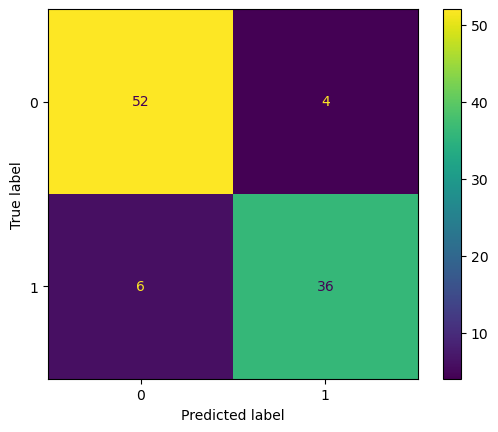

In [82]:
cm = ConfusionMatrixDisplay.from_predictions(y_test,model.predict(x_test_scaled))
print("classification report :",classification_report(y_test,model.predict(x_test_scaled)))


In [83]:
print("Training Score:",round(model.score(x_train_scaled,y_train)*100,2))
y_pred = model.predict(x_test_scaled)
print("Testing Score:",round(accuracy_score(y_test,y_pred)*100,2))


Training Score: 97.42
Testing Score: 89.8


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_cv = RandomForestClassifier(random_state=42)
hyper_fit = GridSearchCV(rf_cv, cv=5,
                         param_grid = {'criterion': ['gini', 'entropy'],
                                       'bootstrap': [True, False],
                                       'max_features': ['sqrt', 'log2', None, 'auto']},
                         n_jobs=-1)
hyper_fit.fit(x_train, y_train)
print('Best Parameter from grid search:', hyper_fit.best_params_)


Best Parameter from grid search: {'bootstrap': True, 'criterion': 'entropy', 'max_features': None}


In [85]:
best_params = hyper_fit.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42)

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=261,
                       random_state=42)>

Training Score: 97.94 %
Testing Score: 92.86 %
Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.93      0.90      0.92        42

    accuracy                           0.93        98
   macro avg       0.93      0.93      0.93        98
weighted avg       0.93      0.93      0.93        98



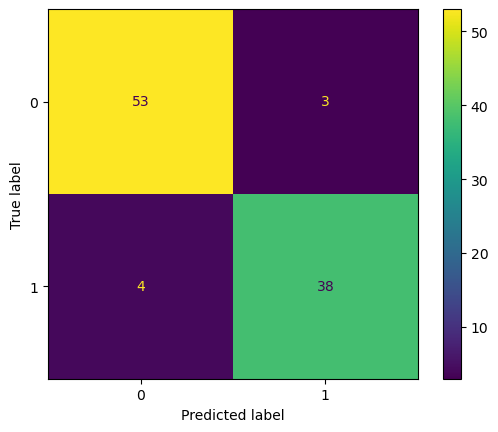

In [86]:
# refining the trees via OOB
final_model.set_params(n_estimators=261, warm_start=False, oob_score=False, random_state=42)

# final model parameters
print(final_model.get_params)

final_model.fit(x_train_scaled, y_train)

# training score
print('\nTraining Score:', round(final_model.score(x_train_scaled, y_train)*100, 2), '%')

# prediction
y_pred_rf = final_model.predict(x_test_scaled)

# metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred_rf)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print('Classification Report:\n\n', classification_report(y_test, y_pred_rf))

94.85
90.82
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.88      0.90      0.89        42

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98



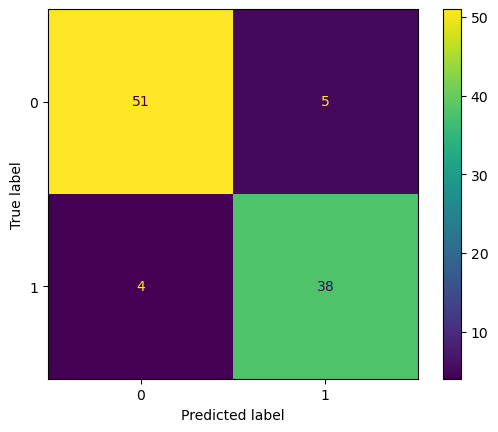

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(x_train_scaled, y_train)
print(round(dt.score(x_train_scaled, y_train)*100,2))

# Testing
dt_pred = dt.predict(x_test_scaled)
print(round(accuracy_score(y_test, dt_pred)*100,2))

# Confusion Matrix and report
cm = ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
report = classification_report(y_test, dt_pred)
print(report)

Training Accuracy: 97.42 %
Testing Accuracy: 92.0


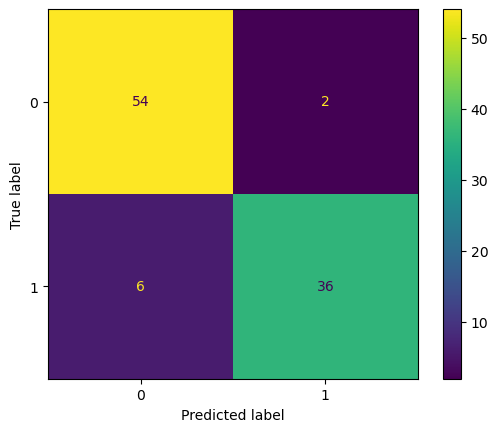

In [88]:
from sklearn.ensemble import AdaBoostClassifier
# estimator
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=1)

# Adaboost model
adboost_model = AdaBoostClassifier(estimator=tree_clf, n_estimators=100)
adboost_model.fit(x_train_scaled, y_train)
print('Training Accuracy:', round(adboost_model.score(x_train_scaled, y_train)*100,2), '%')

# Prediction testing
y_pred_ab = adboost_model.predict(x_test_scaled)

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab)
print('Testing Accuracy:', round(accuracy_score(y_test, y_pred_ab),2)*100)

In [89]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(x_train_scaled, y_train)


# Predictions
y_pred = xgb_clf.predict(x_test_scaled)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        56
           1       0.93      0.90      0.92        42

    accuracy                           0.93        98
   macro avg       0.93      0.93      0.93        98
weighted avg       0.93      0.93      0.93        98



In [90]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
                           param_grid, cv=5, scoring='f1')

grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(x_test_scaled)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Tuned XGBoost Accuracy: 0.9081632653061225
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.92      0.86      0.89        42

    accuracy                           0.91        98
   macro avg       0.91      0.90      0.91        98
weighted avg       0.91      0.91      0.91        98



In [91]:
data.columns

Index(['Cyan Count', 'Magenta Count', 'Yellow Count', 'Black Count',
       'Pantone Colors Count', 'Total Colors Found', 'White Count',
       'Varnish Count', 'Digital or Other', 'Instructions Extracted',
       'Eligible to Bypass PP'],
      dtype='object')

In [92]:
filtered_df = data.drop(['Cyan Count', 'Magenta Count', 'Yellow Count', 'Black Count'],axis=1)
filtered_df.head()

,Pantone Colors Count,Total Colors Found,White Count,Varnish Count,Digital or Other,Instructions Extracted,Eligible to Bypass PP
0,0,5,0,1,1,:\n- Approved for prepress\n- Trap per printer...,1
1,1,2,0,0,1,:\n- Below copy was added in production. Pleas...,1
2,2,3,0,0,1,:\n- Below copy was added in production. Pleas...,1
3,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,0
4,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,0


In [93]:


# ✅ Convert column before applying function
filtered_df["Total Colors Found"] = pd.to_numeric(filtered_df["Total Colors Found"], errors="coerce")
filtered_df["Color Eligible to Bypass"] = filtered_df.apply(determine_color_bypass, axis=1)


Initial number of features: 8
Categorical columns found: ['Pantone Colors Count', 'White Count', 'Varnish Count', 'Digital or Other', 'Eligible to Bypass Auto Trap']
Feature count after categorical encoding: 7
Final feature count after merging TF-IDF: 557
Training accuracy: 97.16
Cross-validation scores: [0.85897436 0.8974359  0.94871795 0.90909091 0.90909091]
Mean CV accuracy: 0.90
Test Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.93      0.88      0.90        42

    accuracy                           0.92        98
   macro avg       0.92      0.91      0.92        98
weighted avg       0.92      0.92      0.92        98

Reloaded categorical encoders: ['Pantone Colors Count', 'White Count', 'Varnish Count', 'Digital or Other', 'Eligible to Bypass Auto Trap']
Model and preprocessing tools saved successfully!


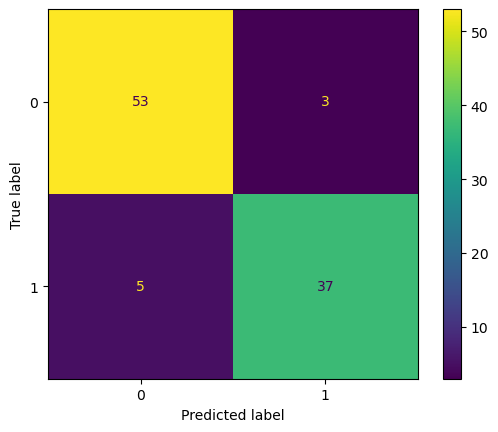

In [94]:
import pandas as pd
import numpy as np
import re
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Ensure filtered_df is a DataFrame
filtered_df = pd.DataFrame(filtered_df) 

# Fill missing values
filtered_df.fillna("", inplace=True)

# Convert only the text column to string
text_column = "Instructions Extracted"
filtered_df[text_column] = filtered_df[text_column].astype(str)

# Remove digits from text column
filtered_df[text_column] = filtered_df[text_column].apply(lambda x: re.sub(r'\d+', '', x))

# ✅ Apply conditions for additional derived columns
if "Total Colors Found" in filtered_df.columns and "Digital or Other" in filtered_df.columns:
    filtered_df["Color Eligible to Bypass"] = filtered_df.apply(
        lambda row: 1 if row["Total Colors Found"] <= 2 or row["Digital or Other"] in [0, 1] else 0,
        axis=1
    )



if "Digital or Other" in filtered_df.columns:
    filtered_df["Eligible to Bypass Auto Trap"] = filtered_df["Digital or Other"]
else:
    print("⚠️ 'Digital or Other' column is missing!")


# Define target column
target_column = "Eligible to Bypass PP"
x = filtered_df.drop(columns=[target_column])  # Features
y_filt = filtered_df[target_column].astype(int)  # Target variable

# Print column count before processing
print(f"Initial number of features: {x.shape[1]}")

x_train_filt, x_test_filt, y_train_filt, y_test_filt = train_test_split(
    x, y_filt, test_size=0.2, random_state=42
)

# Fit TF-IDF on training text and transform test text
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=550)
x_train_text_features = tfidf.fit_transform(x_train_filt[text_column]).toarray()
x_test_text_features = tfidf.transform(x_test_filt[text_column]).toarray()

# Convert to DataFrame
x_train_text_df = pd.DataFrame(x_train_text_features, index=x_train_filt.index, columns=tfidf.get_feature_names_out())
x_test_text_df = pd.DataFrame(x_test_text_features, index=x_test_filt.index, columns=tfidf.get_feature_names_out())

# Drop text column before merging
x_train_filt = x_train_filt.drop(columns=[text_column]).copy()
x_test_filt = x_test_filt.drop(columns=[text_column]).copy()

# Convert categorical variables using LabelEncoder and store mappings
label_encoders = {}
categorical_columns = x_train_filt.select_dtypes(include="object").columns.tolist()

if categorical_columns:
    print(f"Categorical columns found: {categorical_columns}")
else:
    print(" No categorical columns found!")

for col in categorical_columns:
    le = LabelEncoder()
    x_train_filt[col] = le.fit_transform(x_train_filt[col].fillna("Unknown"))
    x_test_filt[col] = le.transform(x_test_filt[col].fillna("Unknown"))
    label_encoders[col] = le  # Store encoder for later use

# Save categorical encoders in a separate file
joblib.dump(label_encoders, "label_encoders.pkl")

# Print column count after encoding
print(f"Feature count after categorical encoding: {x_train_filt.shape[1]}")

# Merge numeric & text features
x_train_filt = pd.concat([x_train_filt, x_train_text_df], axis=1)
x_test_filt = pd.concat([x_test_filt, x_test_text_df], axis=1)

# Print column count after merging text features
print(f"Final feature count after merging TF-IDF: {x_train_filt.shape[1]}")

# Ensure train/test have the same number of columns
assert x_train_filt.shape[1] == x_test_filt.shape[1], "Mismatch in feature size after transformations!"

# Standardize features
scaler = StandardScaler()
x_train_scaled_filt = scaler.fit_transform(x_train_filt)
x_test_scaled_filt = scaler.transform(x_test_filt)

# Train logistic regression model
model_lr = LogisticRegression()
model_lr.fit(x_train_scaled_filt, y_train_filt)
print("Training accuracy:", round(model_lr.score(x_train_scaled_filt, y_train_filt) * 100, 2))

# Cross-validation
cv_scores = cross_val_score(model_lr, x_train_scaled_filt, y_train_filt, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")

# Evaluate on test set
accuracy = model_lr.score(x_test_scaled_filt, y_test_filt)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
y_pred_lr = model_lr.predict(x_test_scaled_filt)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_filt, y_pred_lr)
print("Classification Report:\n", classification_report(y_test_filt, y_pred_lr))

# Save the model & preprocessors
joblib.dump(model_lr, "logistic_regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Save TF-IDF feature names
tfidf_features = tfidf.get_feature_names_out()
joblib.dump(tfidf_features, "tfidf_features.pkl")

# Reload and validate categorical encoders
reloaded_encoders = joblib.load("label_encoders.pkl")
print(f"Reloaded categorical encoders: {list(reloaded_encoders.keys())}")

print("Model and preprocessing tools saved successfully!")


In [95]:
import joblib

# Assuming `x_train_filt` contains categorical features
categorical_columns = list(x_train_filt.columns)  # Get feature names
joblib.dump(categorical_columns, "categorical_columns.pkl") 

['categorical_columns.pkl']

In [96]:
!pip install FastAPI

In [97]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import numpy as np
import re

# Load saved model and preprocessing tools
model = joblib.load("logistic_regression_model.pkl")
scaler = joblib.load("scaler.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
categorical_columns = joblib.load("categorical_columns.pkl")  # Save this during training

# Initialize FastAPI app
app = FastAPI()

# Define request schema
class PredictionRequest(BaseModel):
    Instructions_Extracted: str
    categorical_features: dict

@app.post("/predict")
def predict(data: PredictionRequest):
    try:
        # Preprocess text data (TF-IDF transformation)
        text_feature = [re.sub(r"\d+", "", data.Instructions_Extracted)]  # Remove numbers
        text_transformed = tfidf_vectorizer.transform(text_feature).toarray()

        # Convert categorical features to DataFrame
        cat_features_df = pd.DataFrame([data.categorical_features])

        # Ensure all categorical columns exist (handle missing ones)
        for col in categorical_columns:
            if col not in cat_features_df:
                cat_features_df[col] = 0  # Fill missing categorical columns

        # Convert categorical columns to numerical encoding
        for col in cat_features_df.select_dtypes(include="object").columns:
            cat_features_df[col] = cat_features_df[col].astype("category").cat.codes

        # Combine categorical and text features
        input_data = np.hstack([cat_features_df[categorical_columns].to_numpy(), text_transformed])

        # Debugging step: Check feature shape
        expected_features = scaler.mean_.shape[0]
        actual_features = input_data.shape[1]
        print(f"Expected feature count: {expected_features}, Actual: {actual_features}")

        # Ensure feature size is correct
        if actual_features != expected_features:
            return {"error": f"Feature mismatch: Expected {expected_features}, got {actual_features}"}

        # Scale features
        input_scaled = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(input_scaled)
        prediction_label = int(prediction[0])  # Convert to integer

        return {"prediction": prediction_label}
    
    except Exception as e:
        return {"error": str(e)}

@app.get("/")
def home():
    return {"message": "FastAPI Logistic Regression Model is running!"}




In [98]:
import joblib
import pandas as pd

# Load saved feature names
expected_features = joblib.load("categorical_columns.pkl")
print(f"Expected Features Count: {len(expected_features)}")

# Load new request data
new_data = pd.DataFrame([{"feature1": "value1", "feature2": "value2"}])  # Example

print(f"New Data Features Count: {new_data.shape[1]}")


Expected Features Count: 557
New Data Features Count: 2


In [99]:
filtered_df.head()

,Pantone Colors Count,Total Colors Found,White Count,Varnish Count,Digital or Other,Instructions Extracted,Eligible to Bypass PP,Color Eligible to Bypass,Eligible to Bypass Auto Trap
0,0,5,0,1,1,:\n- Approved for prepress\n- Trap per printer...,1,0,1
1,1,2,0,0,1,:\n- Below copy was added in production. Pleas...,1,1,1
2,2,3,0,0,1,:\n- Below copy was added in production. Pleas...,1,0,1
3,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,0,0,1
4,0,5,1,0,1,:\n- Separate per job specs to print Surface D...,0,0,1
